<hr>
<h1>Image IO & Display</h1>
<hr>

### Please see the [scikit-image documentation](https://scikit-image.org/docs/stable/index.html), especially:
- [User Guide](https://scikit-image.org/docs/stable/user_guide.html)
- [Examples](https://scikit-image.org/docs/stable/auto_examples/)

Always import `numpy`.

In [1]:
import numpy as np

# Example Data

In [2]:
from csbdeep.utils import download_and_extract_zip_file
download_and_extract_zip_file(
    url       = 'https://github.com/mpicbg-csbd/stardist/releases/download/0.1.0/dsb2018.zip',
    targetdir = '../data',
    verbose   = 1,
)

Files found, nothing to download.


# File system

In [3]:
from pathlib import Path

In [4]:
data_dir = Path('..') / 'data'
data_dir

PosixPath('../data')

In [5]:
for f in data_dir.rglob('*'):
    if f.is_dir():
        print(f)

../data/dsb2018
../data/ij-samples
../data/dsb2018/test
../data/dsb2018/train
../data/dsb2018/test/images
../data/dsb2018/test/masks
../data/dsb2018/train/images
../data/dsb2018/train/masks


In [6]:
files = (data_dir / 'dsb2018' / 'train' / 'images').glob('*314*.tif')
files

<generator object Path.glob at 0x1174d4468>

In [7]:
files = sorted(files) # reproducible listing
files

[PosixPath('../data/dsb2018/train/images/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e.tif'),
 PosixPath('../data/dsb2018/train/images/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b.tif'),
 PosixPath('../data/dsb2018/train/images/61dc249314d7b965eb4561ec739eab9b0f60af55c97b25ced8cb2a42a0be128e.tif'),
 PosixPath('../data/dsb2018/train/images/648636ee314d7bdba3ab2fc0fe49a863de35c3e2caf619039f678df67b526868.tif'),
 PosixPath('../data/dsb2018/train/images/724b6b7044522f6d5ea35b55f8fa71d0a45a28687be2b7cac3149943ab816eec.tif'),
 PosixPath('../data/dsb2018/train/images/b7a86f4968071e0f963fa87ef314fdd1b6c73a66355431cc53a37e193ba6be9b.tif'),
 PosixPath('../data/dsb2018/train/images/cf26c41245febfe67c2a1682cc4ee8752ee40ae3e49610314f45923b8bf5b08a.tif'),
 PosixPath('../data/dsb2018/train/images/e2d22d3d283915df8350d039278e314a23e6e8f2b41bdfc16df849e22dd13b36.tif')]

In [8]:
for f in (data_dir / 'ij-samples').iterdir():
    print(f.name)

blobs.gif
flybrain.tif
leaf.jpg


In [9]:
print(f"Path f:      {f}")
print(f"f.exists():  {f.exists()}")
print(f"f.name:      {f.name}")
print(f"f.stem:      {f.stem}")
print(f"f.suffix:    {f.suffix}")
print(f"f.parent:    {f.parent}")
print(f"f.resolve(): {f.resolve()}")

Path f:      ../data/ij-samples/leaf.jpg
f.exists():  True
f.name:      leaf.jpg
f.stem:      leaf
f.suffix:    .jpg
f.parent:    ../data/ij-samples
f.resolve(): /Users/uwe/Documents/Research/MPI/teaching/neubias-ts13/data/ij-samples/leaf.jpg


### Important

Always convert `Path` objects to strings when passing them to other functions that expect file names.

In [10]:
f

PosixPath('../data/ij-samples/leaf.jpg')

In [11]:
str(f)

'../data/ij-samples/leaf.jpg'

# Image IO

[scikit-image](https://scikit-image.org/) can read and write many common image formats (including TIFF).

In [12]:
from skimage.io import imread, imsave

## Reading

In [13]:
blobs = imread(str(data_dir/'ij-samples'/'blobs.gif'))
print(f"blobs is a {type(blobs)} with dtype {blobs.dtype} and shape {blobs.shape}")
blobs.meta

blobs is a <class 'imageio.core.util.Array'> with dtype uint8 and shape (254, 256)


Dict([('version', b'GIF89a'), ('background', 0)])

In [14]:
leaf = imread(str(data_dir/'ij-samples'/'leaf.jpg'))
print(f"leaf is a {type(leaf)} with dtype {leaf.dtype} and shape {leaf.shape}")
leaf.meta

leaf is a <class 'imageio.core.util.Array'> with dtype uint8 and shape (446, 507, 3)


Dict([('jfif', 256),
      ('jfif_version', (1, 0)),
      ('jfif_unit', 0),
      ('jfif_density', (1, 1))])

In [15]:
flybrain = imread(str(data_dir/'ij-samples'/'flybrain.tif'))
print(f"flybrain is a {type(flybrain)} with dtype {flybrain.dtype} and shape {flybrain.shape}")

flybrain is a <class 'numpy.ndarray'> with dtype uint8 and shape (57, 256, 256, 3)


Notice that reading the flybrain TIFF image returned a `numpy.ndarray` that doesn't contain metadata.  
If you want to read metadata and generally need more fine-grained control, use the `tifffile` package directly (used by scikit-image internally).

In [16]:
def get_metadata(tif, show=True):
    """Helper function to extract only non-empty metadata from `tif`"""
    from pprint import pprint
    meta = {}
    for attr in dir(tif):
        if not attr.startswith('_') and attr.find('metadata') != -1:
            attr_val = getattr(tif, attr)
            if attr_val is not None and len(attr_val) > 0:
                meta[attr] = attr_val
                if show:
                    print(f"{attr}\n{'-'*len(attr)}")
                    pprint(attr_val)
    return meta

In [17]:
import tifffile

with tifffile.TiffFile(str(data_dir/'ij-samples'/'flybrain.tif')) as tif:
    # read the actual data, as before
    # note that asarray() has parameters for more fine-grained control
    assert np.all(flybrain == tif.asarray())
    # check all metadata and return/print non-empty ones
    flybrain_meta = get_metadata(tif)
    # example
    print(f"\nspacing = {flybrain_meta['imagej_metadata']['spacing']:.3}{flybrain_meta['imagej_metadata']['unit']}")

imagej_metadata
---------------
{'ImageJ': '1.43d',
 'Info': 'Confocal scan of a Drosophila brain. Green shows an nc82 \n'
         'antibody staining,  red the expression pattern of the GAL4 \n'
         'driver line 78y. The original image was smoothed and \n'
         'resampled 4 times in each direction. The brain was  prepared \n'
         'and scanned in the Heisenberg lab in Wuerzburg, Germany. \n'
         'Courtesy of Benjamin Schmid, author of the ImageJ 3D Viewer\n'
         '(http://www.neurofly.de/).\n',
 'images': 57,
 'loop': False,
 'slices': 57,
 'spacing': 3.9473684210526314,
 'unit': 'um'}

spacing = 3.95um


Also possible to read images from URLs:

In [18]:
np.all(blobs == imread('https://imagej.nih.gov/ij/images/blobs.gif'))

True

### Metadata

Image metadata (axes semantics, physcial size, etc.) is often not easily accessible (see above), especially for scientific images.  
The convention for axes ordering is `ZYXC`, see [this](https://scikit-image.org/docs/stable/user_guide/numpy_images.html#coordinate-conventions) for details.

### Special file formats

There might be dedicated Python packages for special file formats, as are common in microscopy
(e.g. [czifile](https://pypi.org/project/czifile/)).

Additionally, it is possible to use [python-bioformats](https://pypi.org/project/python-bioformats/), which is
[maintained and used by CellProfiler](https://github.com/CellProfiler/python-bioformats).  
Python-bioformats is a wrapper for the Java library [Bio-Formats](https://www.openmicroscopy.org/bio-formats/),
and needs to start a Java virtual machine from Python to be used.

I can't comment much on these libraries as I haven't used them.

## Writing

In [19]:
for suffix in ['.png','.jpg','.gif','.tif','.bmp']:
    f = Path('blobs_copy').with_suffix(suffix)
    imsave(str(f), blobs)

    print(f"{f} is {'    a' if np.all(blobs == imread(str(f))) else 'not a'} lossless copy.")
    f.unlink() # delete f

blobs_copy.png is     a lossless copy.
blobs_copy.jpg is not a lossless copy.
blobs_copy.gif is     a lossless copy.
blobs_copy.tif is     a lossless copy.
blobs_copy.bmp is     a lossless copy.


If you want to make sure your TIFF is compatible with ImageJ and will be opened with correct axes.

In [20]:
from csbdeep.io import save_tiff_imagej_compatible

f = Path('flybrain_channel0.tif')
save_tiff_imagej_compatible(str(f), flybrain[...,0], axes='ZYX')
f.unlink()

# Image display

[Matplotlib](https://matplotlib.org/) is the most widely used (2D) plotting library in Python.

In [21]:
import matplotlib.pyplot as plt

In [22]:
# to show images directly in the notebook
# + works even if Jupyter server is running remotely
# - not interactive

%matplotlib inline

# to have nice figures for HiDPI displays
%config InlineBackend.figure_format = 'retina'

In [23]:
# to show images in a separate viewer window
# - does not work with a remote Jupyter server
# + some interactivity (panning, zooming, etc.)

#%matplotlib qt

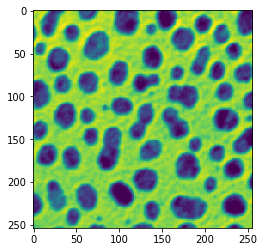

In [24]:
plt.imshow(blobs)
plt.show() # optional in Jupyter notebook

Change colormap 

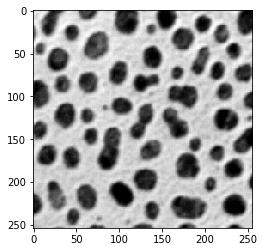

In [25]:
plt.imshow(blobs, cmap='gray');

Colormap not needed (ignored) for color images (2D image with exactly 3 channels)

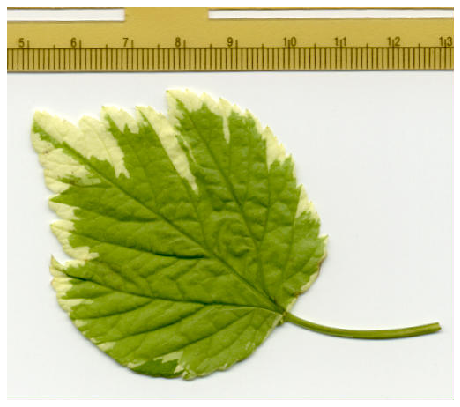

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(leaf)
plt.axis('off');

Can't display 3D data with matplotlib. Need to show a slice, projection, or frame (time series).  
Also demonstrates how to add a scalebar using the [matplotlib-scalebar](https://github.com/ppinard/matplotlib-scalebar) package.

In [27]:
def add_scalebar(ax):
    try:
        from matplotlib_scalebar.scalebar import ScaleBar
        scalebar = ScaleBar (
            dx = flybrain_meta['imagej_metadata']['spacing'],
            units = flybrain_meta['imagej_metadata']['unit'],
            color = 'w',
            box_color = 'k',
        )
        ax.add_artist(scalebar)
    except ModuleNotFoundError:
        print("matplotlib_scalebar not installed.")

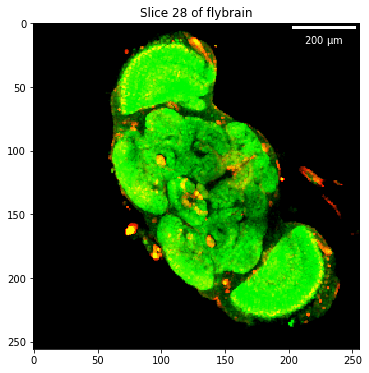

In [28]:
plt.figure(figsize=(6,6))
s = flybrain.shape[0] // 2
plt.imshow(flybrain[s])
add_scalebar(plt.gca())
plt.title(f"Slice {s} of flybrain");

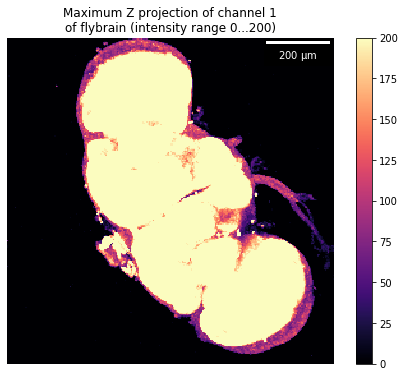

In [29]:
plt.figure(figsize=(8,6))
flybrain_proj = np.max(flybrain, axis=0)
flybrain_proj = flybrain_proj[...,1]
plt.imshow(flybrain_proj, clim=(0,200), cmap='magma')
plt.title("Maximum Z projection of channel 1\nof flybrain (intensity range 0...200)");
plt.axis('off')
add_scalebar(plt.gca())
plt.colorbar();